# Question 2 -
Using the Forest cover-types dataset from Scikit-learn, implement a
classification model based on the following directions

● Implement basic dataset preprocessing (if required), like imputing
NULL values, encoding categorical variables, scaling numerical
variables, etc.

● EDA (with proper inference from the dataset)

● Train-Test-Split - Use the following as the parameters of
train_test_split to take a train set and test set from the
above-mentioned 3 different vectorized datasets.

* ○ test_size - 0.2
* ○ stratify - True
* ○ random_state - 21
* ○ shuffle - True
* ○ train_size - 0.8

● Implement a simple ML model on the train set

● Implement a DL model on the train set

● Evaluation Metrics - Using the test set of the above-mentioned 3
different vectorized datasets test all the above-mentioned models
on the following metrics.

* Accuracy
* Precision
* Recall
* F1 Score

In [1]:
!pip install tensorflow

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
warnings.filterwarnings("ignore")


The Forest CoverType dataset contains information on forest cover types in the Roosevelt National Forest of northern Colorado. Here is a summary of the dataset:

1. Title: Forest Covertype data

2. Sources: The database was originally owned by the Remote Sensing and GIS Program, Department of Forest Sciences, Colorado State University. It was donated by Jock A. Blackard (GIS Coordinator, USFS - Forest Inventory & Analysis) and Dr. Denis J. Dean (Professor, Program in Geography and Geospatial Sciences, School of Economic, Political and Policy Sciences, UT Dallas) in August 1998.

3. Past Usage: The dataset has been used in various research studies comparing the accuracies of artificial neural networks and discriminant analysis in predicting forest cover types from cartographic variables.

4. Relevant Information: The dataset predicts forest cover types from cartographic variables without using remotely sensed data. The study area includes four wilderness areas representing forests with minimal human-caused disturbances, allowing for the study of natural forest cover types.

5. Number of Instances: 581,012 observations

6. Number of Attributes: 12 measures, but 54 columns of data (10 quantitative variables, 4 binary wilderness areas, and 40 binary soil type variables)

7. Attribute Information: The attributes include quantitative measurements such as elevation, aspect, slope, horizontal and vertical distances to hydrology and roadways, hillshade indices, horizontal distance to fire points, and binary variables representing wilderness areas and soil types. The forest cover type is the classification problem with 7 classes.

8. Basic Summary Statistics (for quantitative variables only):
   - Elevation: mean=2959.36 meters, std dev=279.98
   - Aspect: mean=155.65 azimuth, std dev=111.91
   - Slope: mean=14.10 degrees, std dev=7.49
   - Horizontal_Distance_To_Hydrology: mean=269.43 meters, std dev=212.55
   - Vertical_Distance_To_Hydrology: mean=46.42 meters, std dev=58.30
   - Horizontal_Distance_To_Roadways: mean=2350.15 meters, std dev=1559.25
   - Hillshade_9am: mean=212.15 (0 to 255 index), std dev=26.77
   - Hillshade_Noon: mean=223.32 (0 to 255 index), std dev=19.77
   - Hillshade_3pm: mean=142.53 (0 to 255 index), std dev=38.27
   - Horizontal_Distance_To_Fire_Points: mean=1980.29 meters, std dev=1324.19

9. Missing Attribute Values: None

10. Class Distribution:
   - Spruce/Fir: 211,840 records
   - Lodgepole Pine: 283,301 records
   - Ponderosa Pine: 35,754 records
   - Cottonwood/Willow: 2,747 records
   - Aspen: 9,493 records
   - Douglas-fir: 17,367 records
   - Krummholz: 20,510 records
   - Other: 0 records

The dataset provides valuable information for predicting forest cover types based on cartographic variables, and it has been extensively used in research on predictive modeling and forest management strategies.

#importing all the required libraries

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import os

warnings.filterwarnings("ignore")


#Exploratory Data Analysis

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#path to the data
root_path = "/content/drive/MyDrive/Applied_AI/forest"

In [6]:
df = pd.read_csv(os.path.join(root_path,'main.csv'),sep='\t',index_col=False)
df.drop(columns=['Unnamed: 0'], inplace=True)
test_df = pd.read_csv(os.path.join(root_path,'test.csv'),sep='\t',index_col=False)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
print('Data Dimension of Main.csv:')
print('Number of Records:', df.shape[0])
print('Number of Features:', df.shape[1])

Data Dimension of Main.csv:
Number of Records: 464809
Number of Features: 55


In [8]:
print('Data Dimension of test.csv:')
print('Number of Records:', test_df.shape[0])
print('Number of Features:', test_df.shape[1])

Data Dimension of test.csv:
Number of Records: 116203
Number of Features: 54


In [9]:
#Names of columns
print('Feature Names')
print(df.columns)

numerical_columns = df.columns[:10]
binary_columns = df.columns[10:54]


Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soi

In [10]:
#info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           463084 non-null  float64
 1   Aspect                              463145 non-null  float64
 2   Slope                               463146 non-null  float64
 3   Horizontal_Distance_To_Hydrology    463212 non-null  float64
 4   Vertical_Distance_To_Hydrology      463232 non-null  float64
 5   Horizontal_Distance_To_Roadways     463236 non-null  float64
 6   Hillshade_9am                       463157 non-null  float64
 7   Hillshade_Noon                      463067 non-null  float64
 8   Hillshade_3pm                       463216 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  463145 non-null  float64
 10  Wilderness_Area_0                   463131 non-null  float64
 11  Wilderness_Area_1         

In [11]:
#Let's check for missing values once again
df.isnull().sum()

Elevation                             1725
Aspect                                1664
Slope                                 1663
Horizontal_Distance_To_Hydrology      1597
Vertical_Distance_To_Hydrology        1577
Horizontal_Distance_To_Roadways       1573
Hillshade_9am                         1652
Hillshade_Noon                        1742
Hillshade_3pm                         1593
Horizontal_Distance_To_Fire_Points    1664
Wilderness_Area_0                     1678
Wilderness_Area_1                     1603
Wilderness_Area_2                     1705
Wilderness_Area_3                     1614
Soil_Type_0                           1621
Soil_Type_1                           1608
Soil_Type_2                           1639
Soil_Type_3                           1610
Soil_Type_4                           1628
Soil_Type_5                           1621
Soil_Type_6                           1702
Soil_Type_7                           1709
Soil_Type_8                           1664
Soil_Type_9

In [12]:
#Let's check for missing values once again
test_df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


## Handling missing value

In [13]:
test_df.shape

(116203, 54)

In [14]:

# Select rows with NaN in the "Label" column
nan_label_rows = df[df["label"].isna()]

# Create a new dataset with the selected rows
new_dataset = nan_label_rows.drop('label',axis=1)

test_df = pd.concat([test_df,new_dataset],ignore_index=True)
# Drop the selected rows from the original dataset
df = df.dropna(subset=["label"])

# Split the data into features (X) and target variable (y)
X = df.drop('label', axis=1)  # Replace 'label_column' with the actual name of your label column
y = df['label']

# Perform train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Now X_train and y_train contain the training data, and X_test and y_test contain the testing data.


In [15]:
columns = X_train.columns

In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Create the pipeline for numerical columns (impute with mean)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create the pipeline for categorical columns (impute with median)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Create the column transformer to apply the pipelines to specific columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, binary_columns)
])

# Apply the preprocessing pipeline to the DataFrame
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert the transformed data back to a DataFrame
X_train = pd.DataFrame(X_train, columns=numerical_columns.tolist() + binary_columns.tolist())
X_test = pd.DataFrame(X_test, columns=numerical_columns.tolist() + binary_columns.tolist())

In [41]:
#saving the preprocessor pkl file
model_saveing_root_path = '/content/Models'

os.makedirs(os.path.join(model_saveing_root_path,'preprocessor'),exist_ok=True)
pickle.dump(preprocessor,open(os.path.join(model_saveing_root_path,'preprocessor','preprocessor.pkl'),'wb'))

In [42]:
pickle.dump(categorical_pipeline,open(os.path.join(model_saveing_root_path,'preprocessor','categoriacl.pkl'),'wb'))
pickle.dump(numerical_pipeline,open(os.path.join(model_saveing_root_path,'preprocessor','numerical.pkl'),'wb'))

In [17]:
y_test.value_counts()

2.0    45168
1.0    33777
3.0     5697
7.0     3269
6.0     2769
5.0     1514
4.0      438
Name: label, dtype: int64

In [18]:
new_df = pd.concat([X_train,X_test],ignore_index=True)

In [19]:
label = list(y_train.values)+list(y_test.values)
new_df['label'] = label

In [20]:
new_df['label'].value_counts()

2.0    225838
1.0    168885
3.0     28486
7.0     16343
6.0     13843
5.0      7569
4.0      2193
Name: label, dtype: int64



##Skewness

  The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, it means that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail.



In [21]:
print('Skewness of the below features:')
print(new_df.skew())

Skewness of the below features:
Elevation                              -0.820421
Aspect                                  0.403934
Slope                                   0.792496
Horizontal_Distance_To_Hydrology        1.144138
Vertical_Distance_To_Hydrology          1.791702
Horizontal_Distance_To_Roadways         0.716616
Hillshade_9am                          -1.179181
Hillshade_Noon                         -1.075145
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.293344
Wilderness_Area_0                       0.212676
Wilderness_Area_1                       4.074489
Wilderness_Area_2                       0.263912
Wilderness_Area_3                       3.577588
Soil_Type_0                            13.722777
Soil_Type_1                             8.629285
Soil_Type_2                            10.822314
Soil_Type_3                             6.617871
Soil_Type_4                            19.264532
Soil_Type_5                          

[]

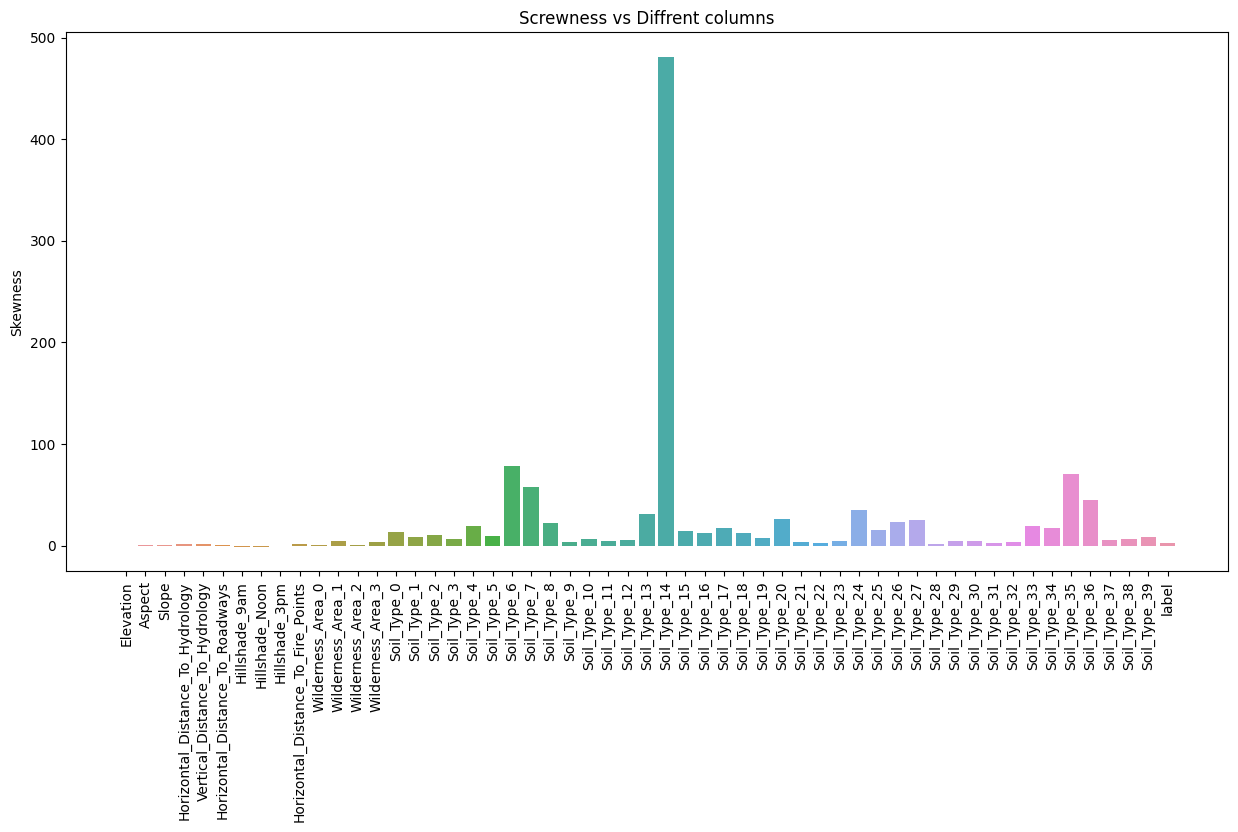

In [22]:
skew=new_df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)
plt.title("Screwness vs Diffrent columns")
plt.plot()



#Inferences:

    Some of the Variables are heavily skewed hence need to be corrected or transformed on a later stage.



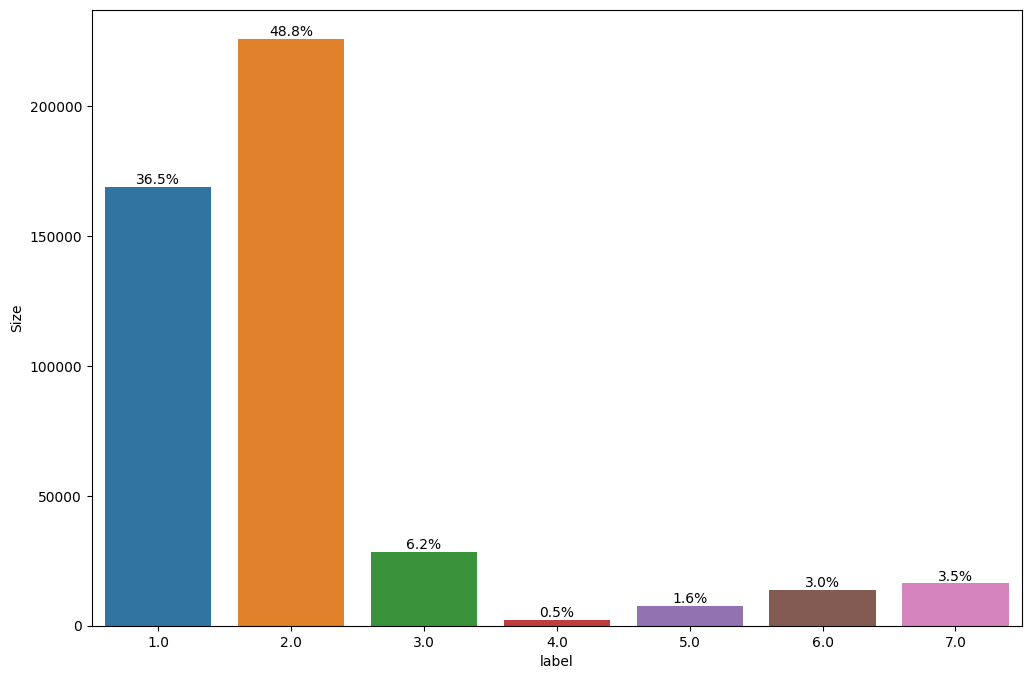

In [23]:

class_dist=new_df.groupby('label').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(12,8))

percentage = [(x/class_dist.sum())*100 for x in class_dist]
# Create the bar plot
ax = sns.barplot(x=class_label.index, y='Size', data=class_label)
# Add percentage labels to the bars
for i, v in enumerate(class_dist):
    ax.text(i, v + 1, f'{percentage[i]:.1f}%', ha='center', va='bottom')
plt.show()



#Inferences:

    Cover_Type 1 and 2 i.e Spruce/Fir and Lodgepole Pine seems to dominate the area.
    Also the Cover_Type 4 i.e Cottonwood/Willow is minimal compare to the rest



In [24]:
new_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,label
0,2879.0,93.0,9.0,433.0,66.0,3588.0,235.0,226.0,121.0,3004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,3014.0,39.0,13.0,361.0,61.0,1275.0,220.0,211.0,123.0,2407.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,3404.0,175.0,19.0,127.0,30.0,2312.0,227.0,246.0,143.0,3361.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3191.0,147.0,10.0,212.0,10.0,4350.0,234.0,239.0,136.0,1050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3024.0,252.0,38.0,524.0,93.0,2121.0,112.0,234.0,241.0,1177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


## deviding the columns into the numerical & categorical/ binary columns

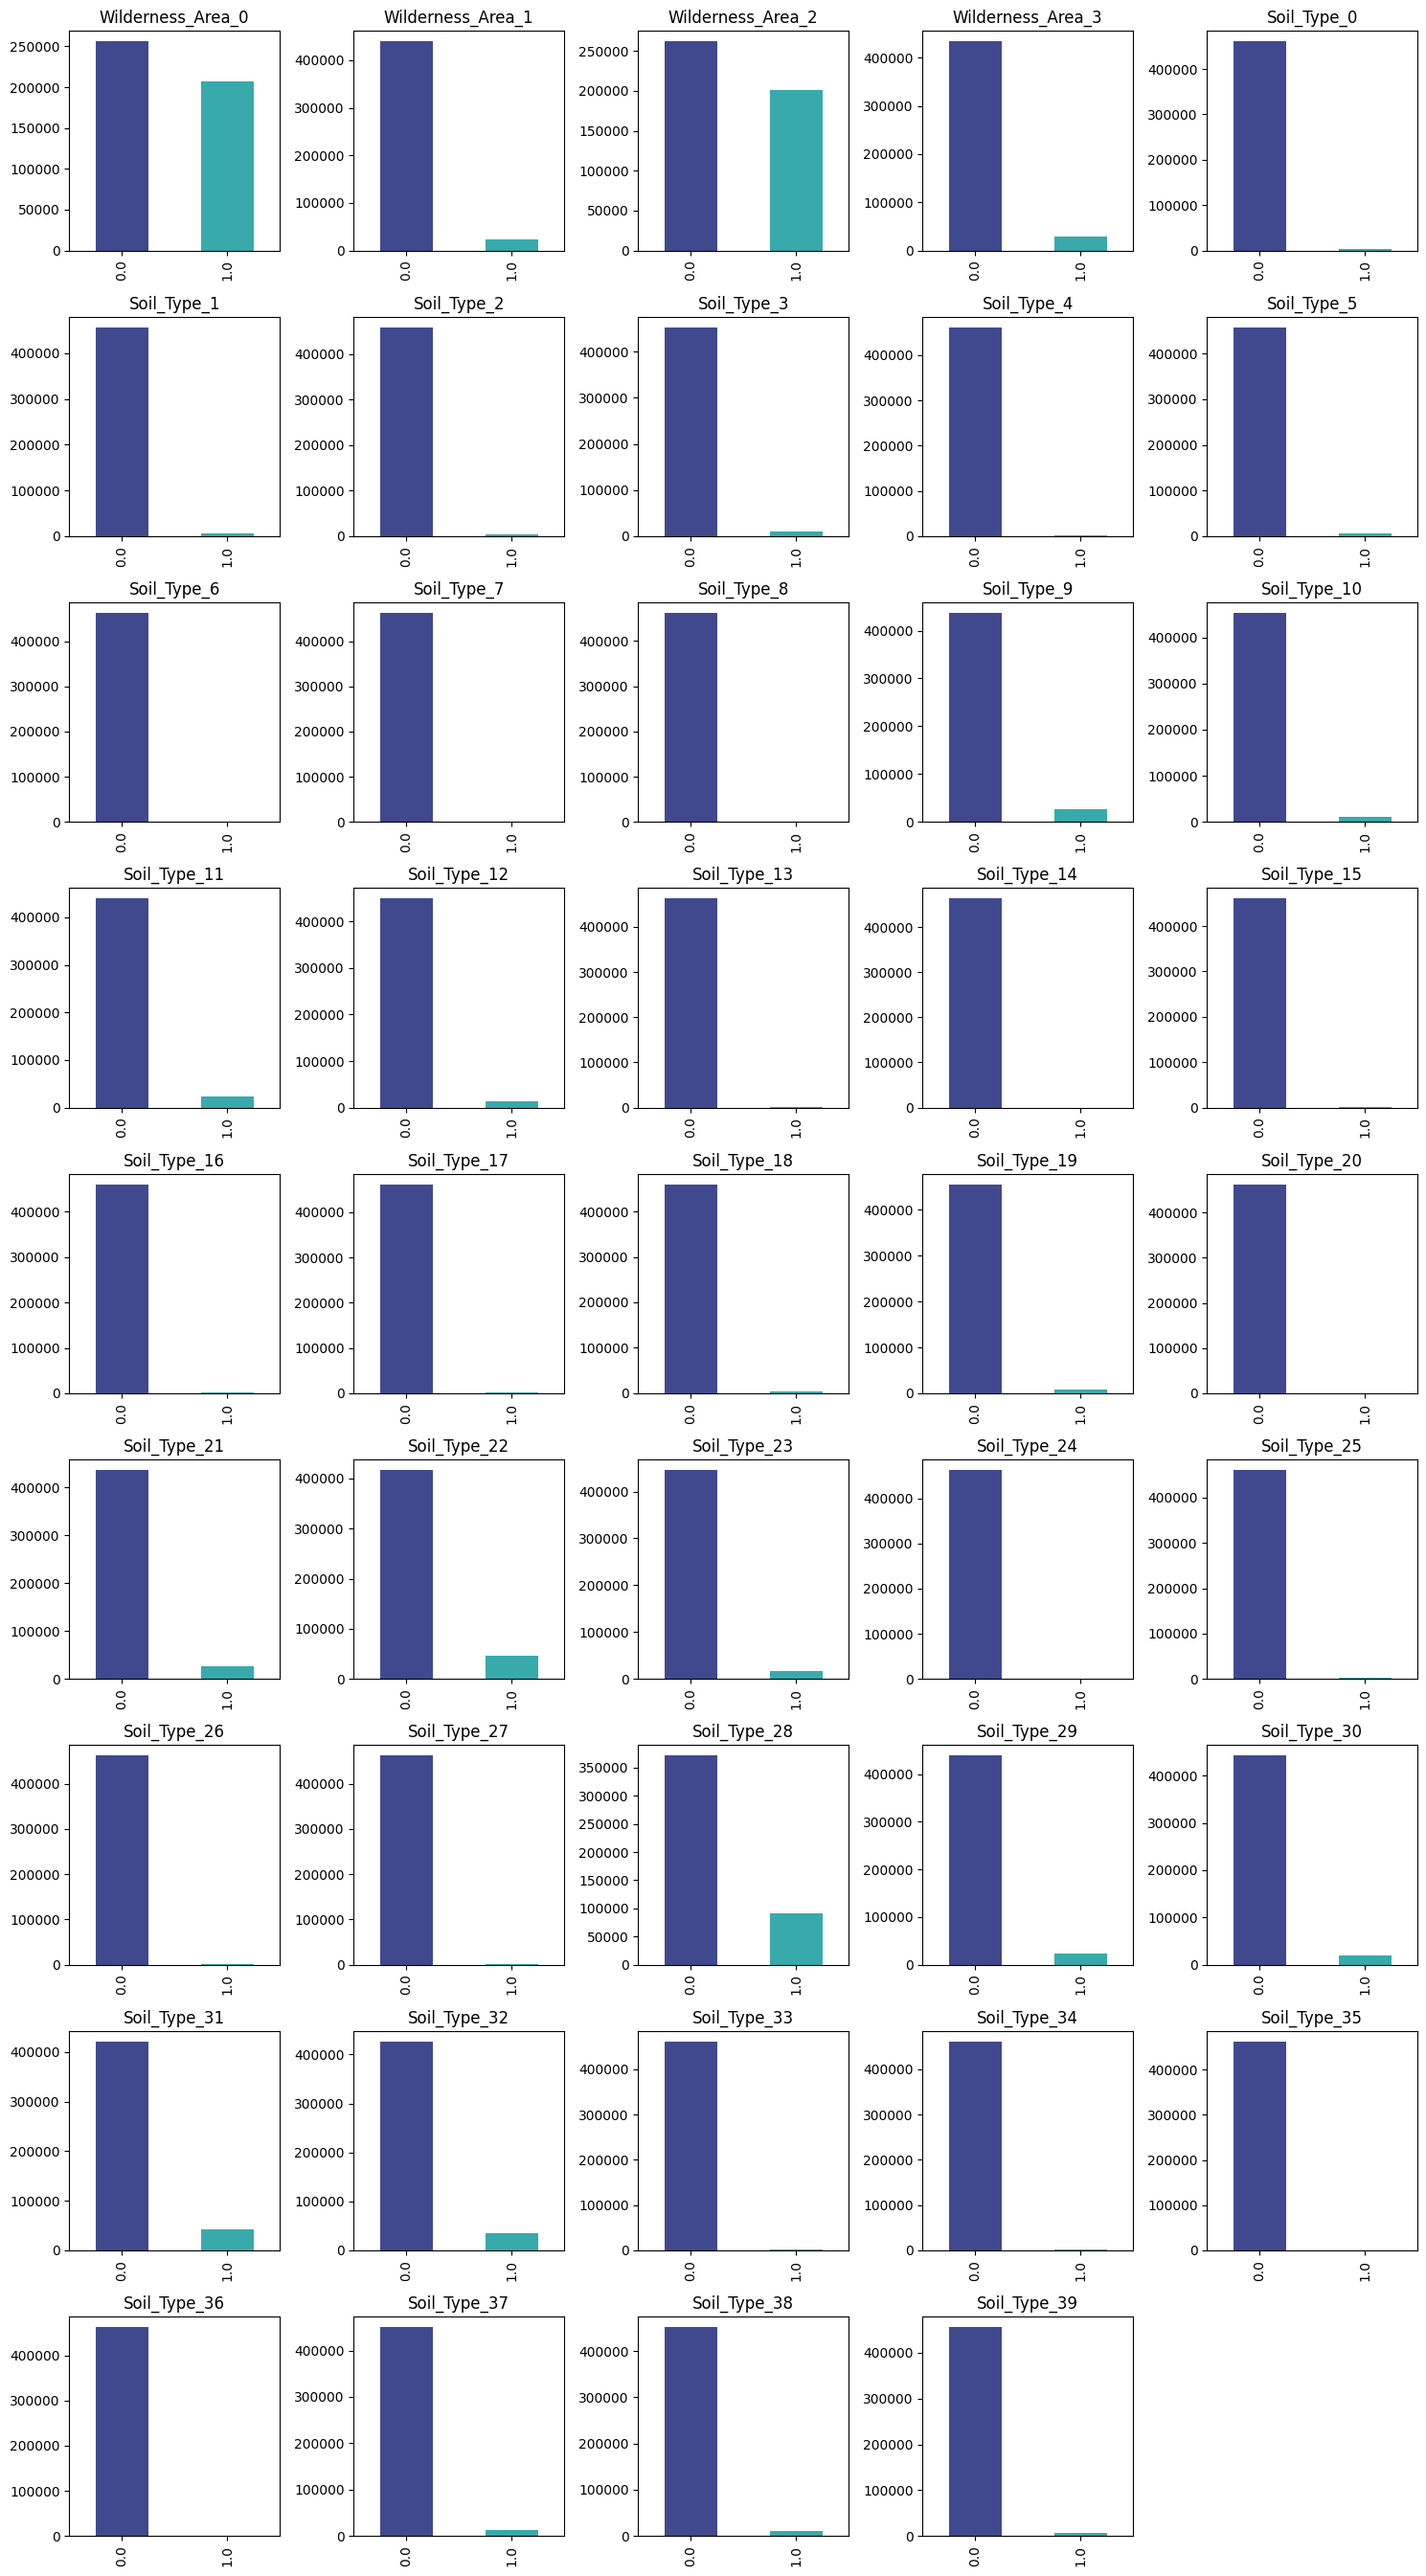

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with 40 categorical columns

# List of column names you want to plot (replace with actual column names)
categorical_columns = binary_columns
# Calculate the number of rows and columns needed for the subplots
num_rows = (len(categorical_columns) + 4) // 5  # Assuming 5 subplots per row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(15, num_rows * 3))

# Flatten the axes array in case the number of columns is not a multiple of 5
axes = axes.flatten()

# Loop through the columns and plot each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    class_counts = new_df[column].value_counts()

    # Generate a custom color palette based on the number of unique classes
    n_classes = len(class_counts)
    colors = sns.color_palette('mako', n_classes)

    # Plot the bar plot with heatmap colors
    class_counts.plot(kind='bar', ax=ax, color=colors)

    ax.set_title(column)

# Hide any empty subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Adjust spacing between subplots and display the plot
plt.tight_layout()
plt.show()


In [26]:
print('Soil Type',' Occurence_count')
for col in binary_columns:
    count=new_df[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type_6 75
Soil_Type_7 138
Soil_Type_8 916
Soil_Type_13 470
Soil_Type_14 2
Soil_Type_20 671
Soil_Type_24 376
Soil_Type_26 859
Soil_Type_27 752
Soil_Type_35 94
Soil_Type_36 234


# Inferences:

* The dataset contains several soil types with very few occurrences.

* Statistically speaking, for half a million records (581,012), a balanced distribution would have approximately 14,500 records per soil type since there are 40 different soil types.

* However, the actual distribution in the dataset seems to deviate from the expected balanced distribution. This imbalance in the data is common and does not necessarily affect the analysis, but it may be worth considering the impact of these small-sized features.

* Let's identify the soil types with occurrence sizes of less than 1000:

    - Soil_Type_6: 75 occurrences
    - Soil_Type_7: 138 occurrences
    - Soil_Type_8: 916 occurrences
    - Soil_Type_13: 470 occurrences
    - Soil_Type_14: 2 occurrences
    - Soil_Type_20: 671 occurrences
    - Soil_Type_24: 376 occurrences
    - Soil_Type_26: 859 occurrences
    - Soil_Type_27: 752 occurrences
    - Soil_Type_35: 94 occurrences
    - Soil_Type_36: 234 occurrences

These are the soil types that have occurrence counts of less than 1000, and it might be beneficial to handle or remove them from the analysis to ensure a more balanced representation of the data.

* It might be beneficial to handle or remove these small-sized features from the analysis to ensure a more balanced representation of the data.

* we will check again after the missing value imputation with the median value for the binary columns & if the value is less than 1000 we can drop the column.

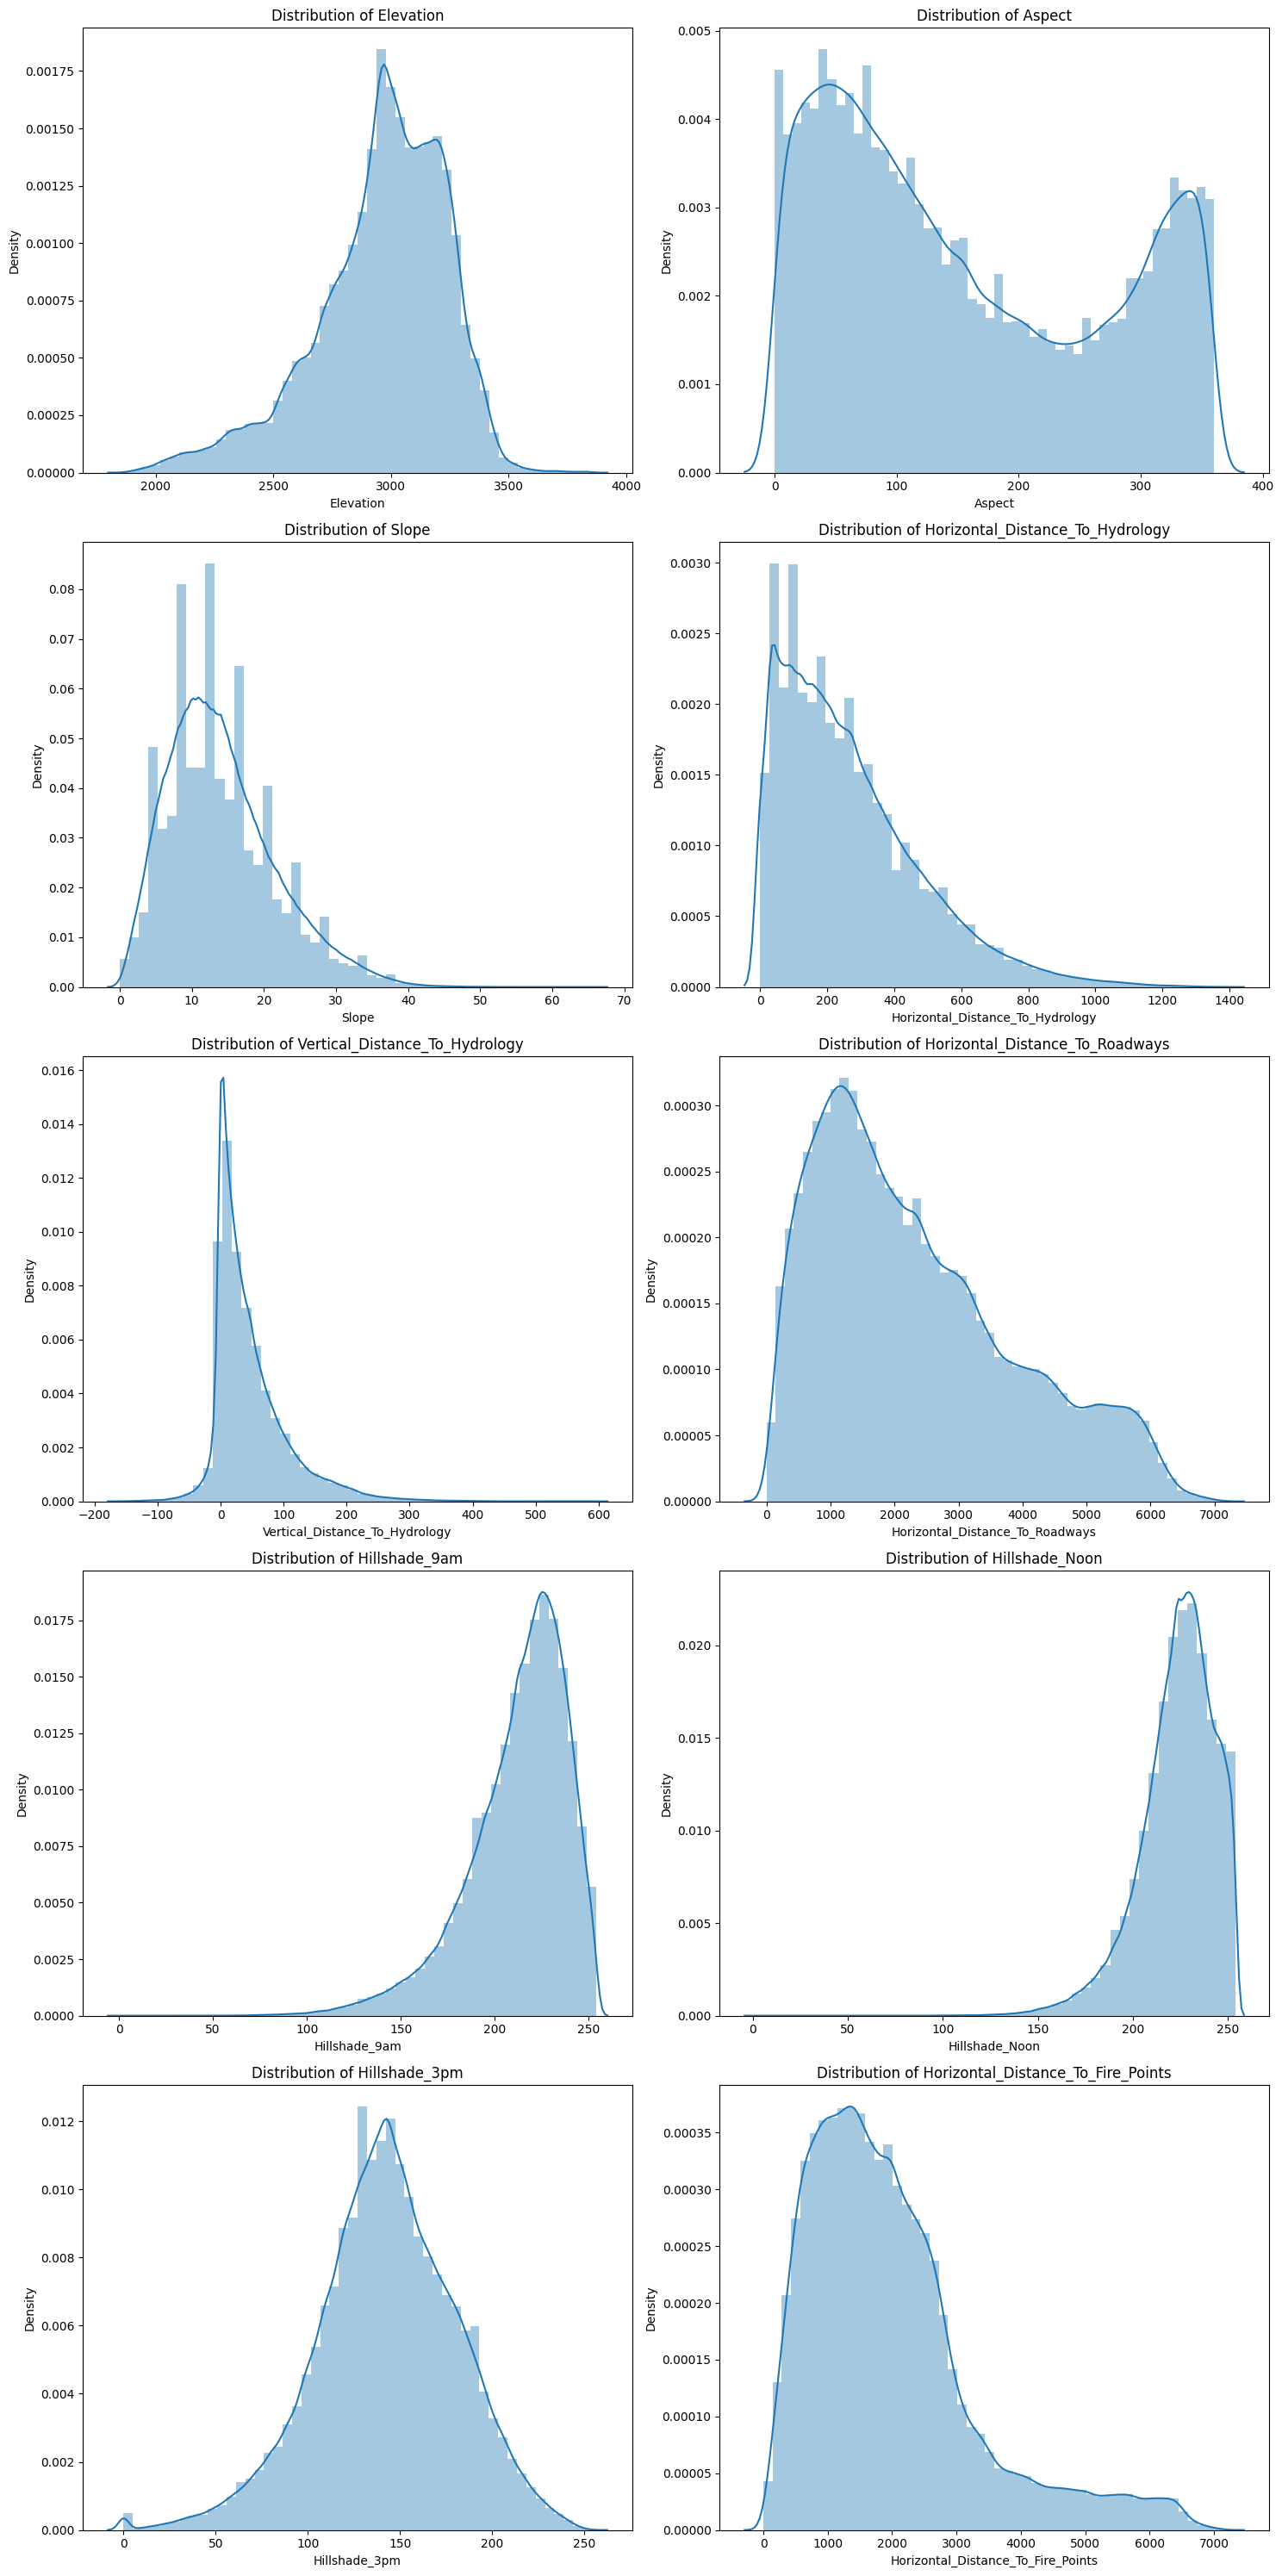

In [27]:

# Calculate the number of rows needed for the subplots
num_rows = (len(numerical_columns) + 1) // 2

# Create subplots with two columns and variable number of rows
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 6 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through numerical columns and create a distplot in each subplot
for i, col in enumerate(numerical_columns):
    sns.distplot(new_df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

* The preceding visualizations provide valuable insights into the observed skewness. Now, let us delve into Bivariate and Multivariate Analysis.

* Next, we will assess the distribution concerning our target variable. This step is crucial in uncovering significant patterns.

* Specifically, we will examine the shape of continuous features concerning the target class. To accomplish this, we will utilize the continuous_data (cont_data) and construct a box plot against the target variable.

Additionally, exploring the violin plot can be rewarding as it presents the information in a visually captivating manner.

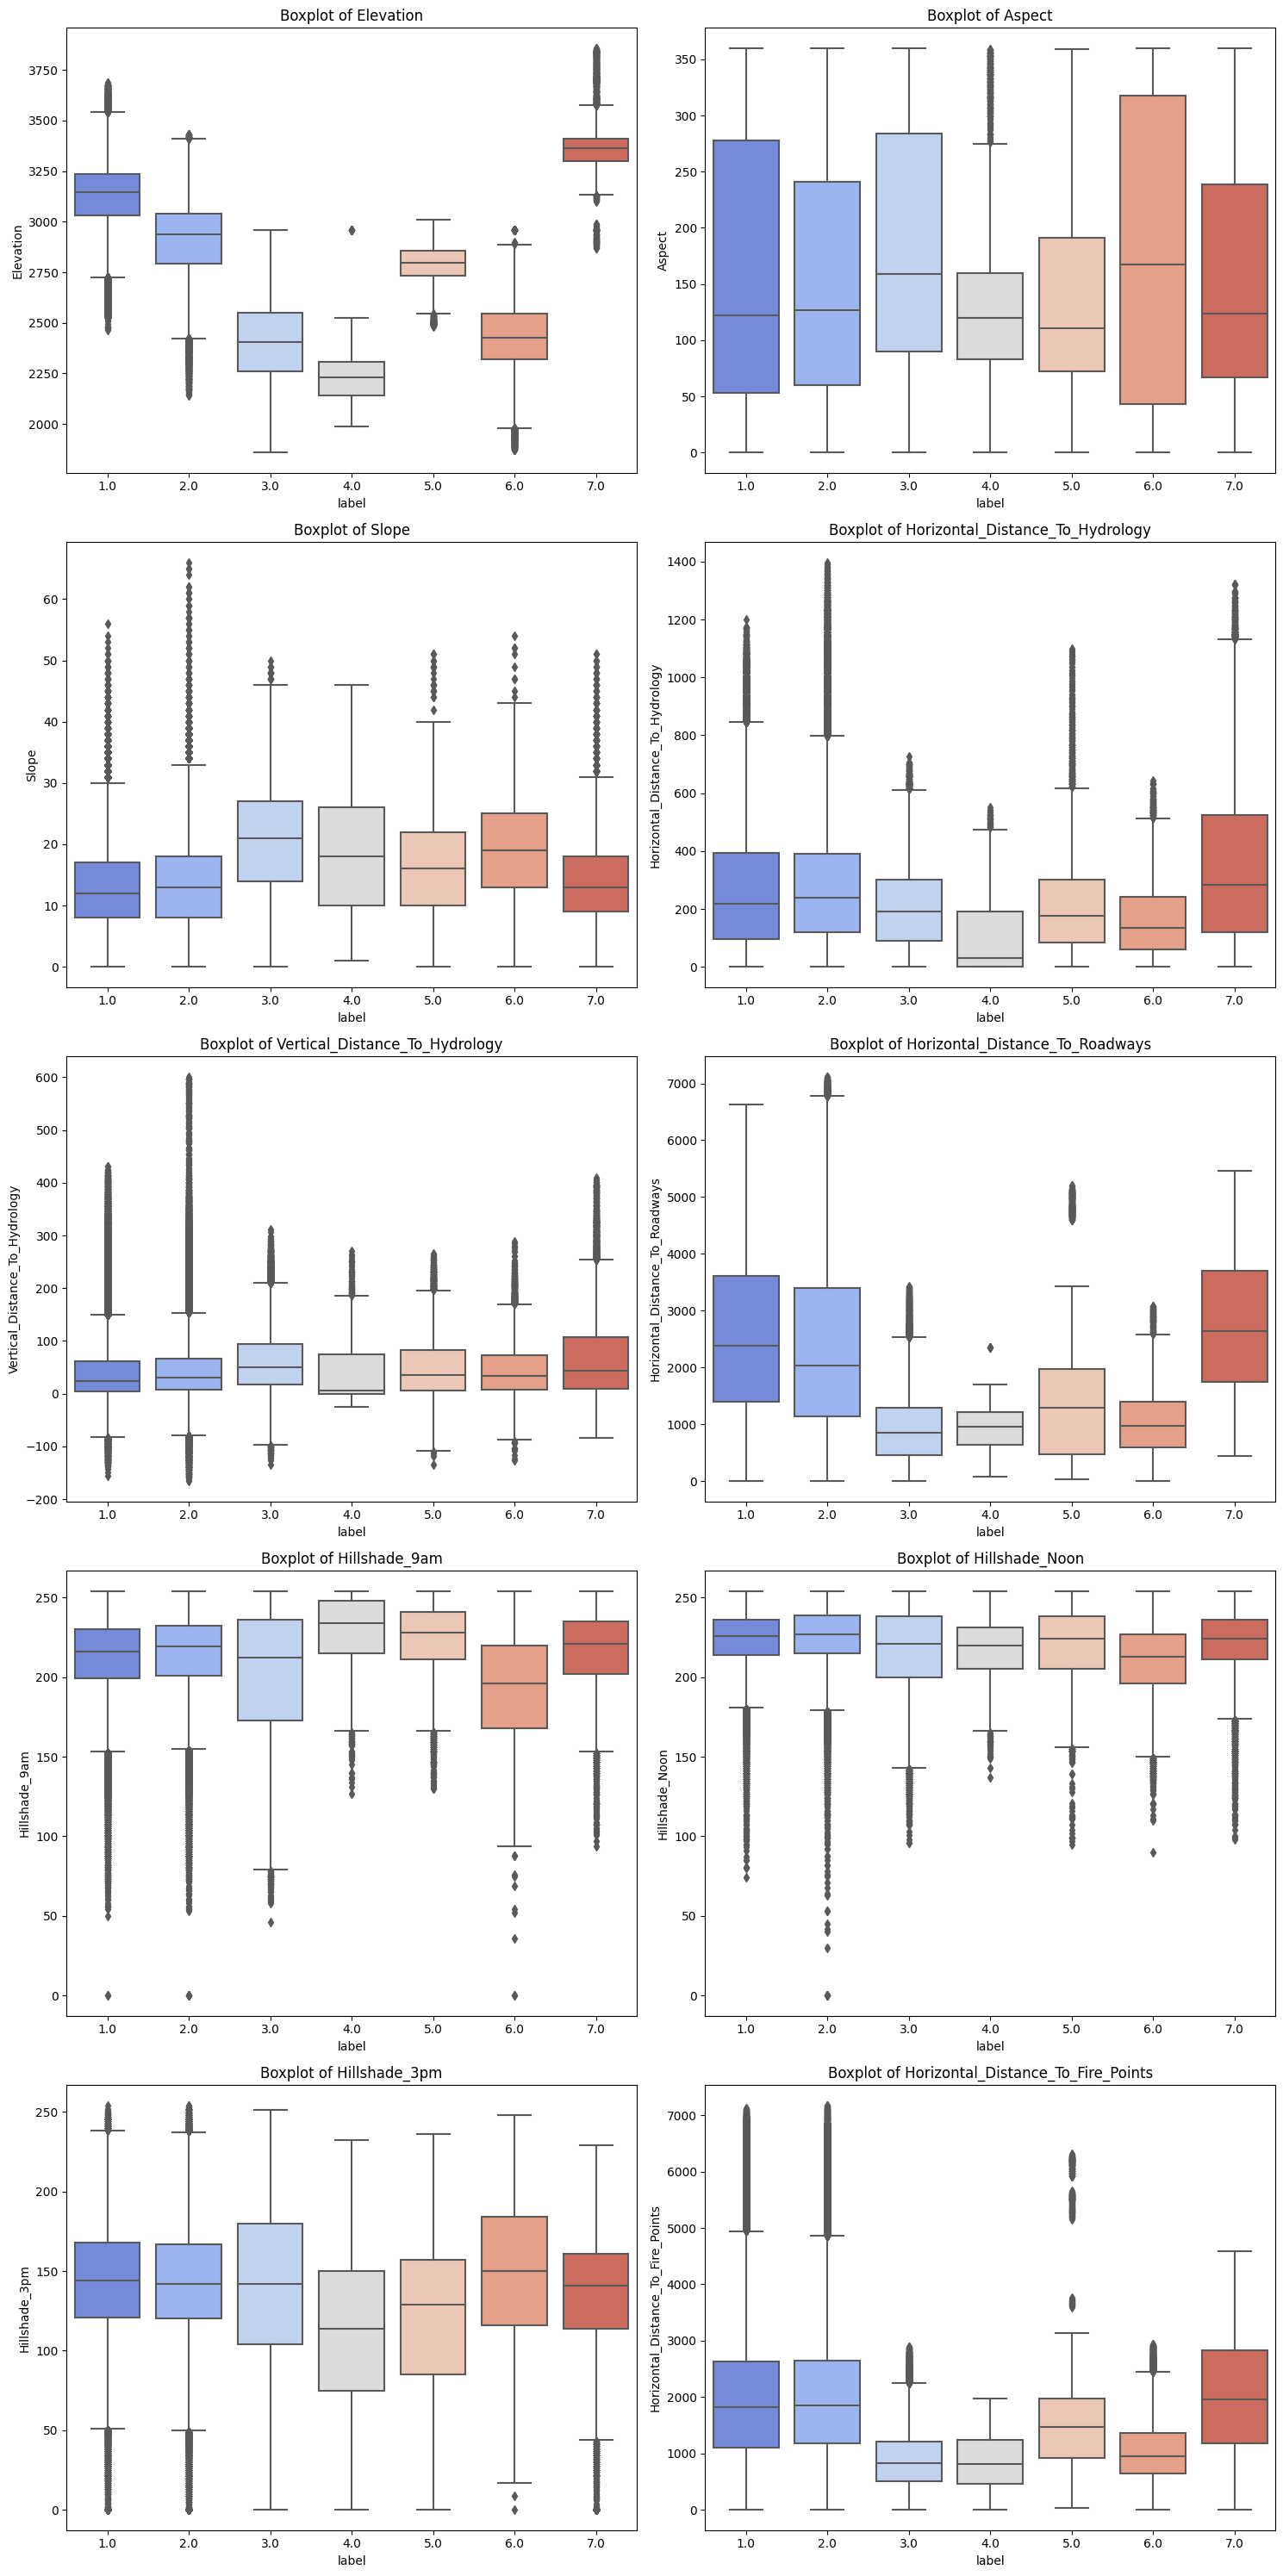

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert target class into category
new_df['label'] = new_df['label'].astype('category')

# Calculate the number of rows and columns for the subplots
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through numerical columns and create boxplots for each one
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=new_df['label'], y=col, data=new_df, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Let's now derive some general insights from the data analysis. We observe that certain features exhibit minimal variance concerning the target classes, suggesting limited discriminative power. Conversely, features like 'Elevation', 'Slope', and 'Horizontal distance to roadways' display substantial differentiation between the classes, indicating their effectiveness in capturing valuable information.

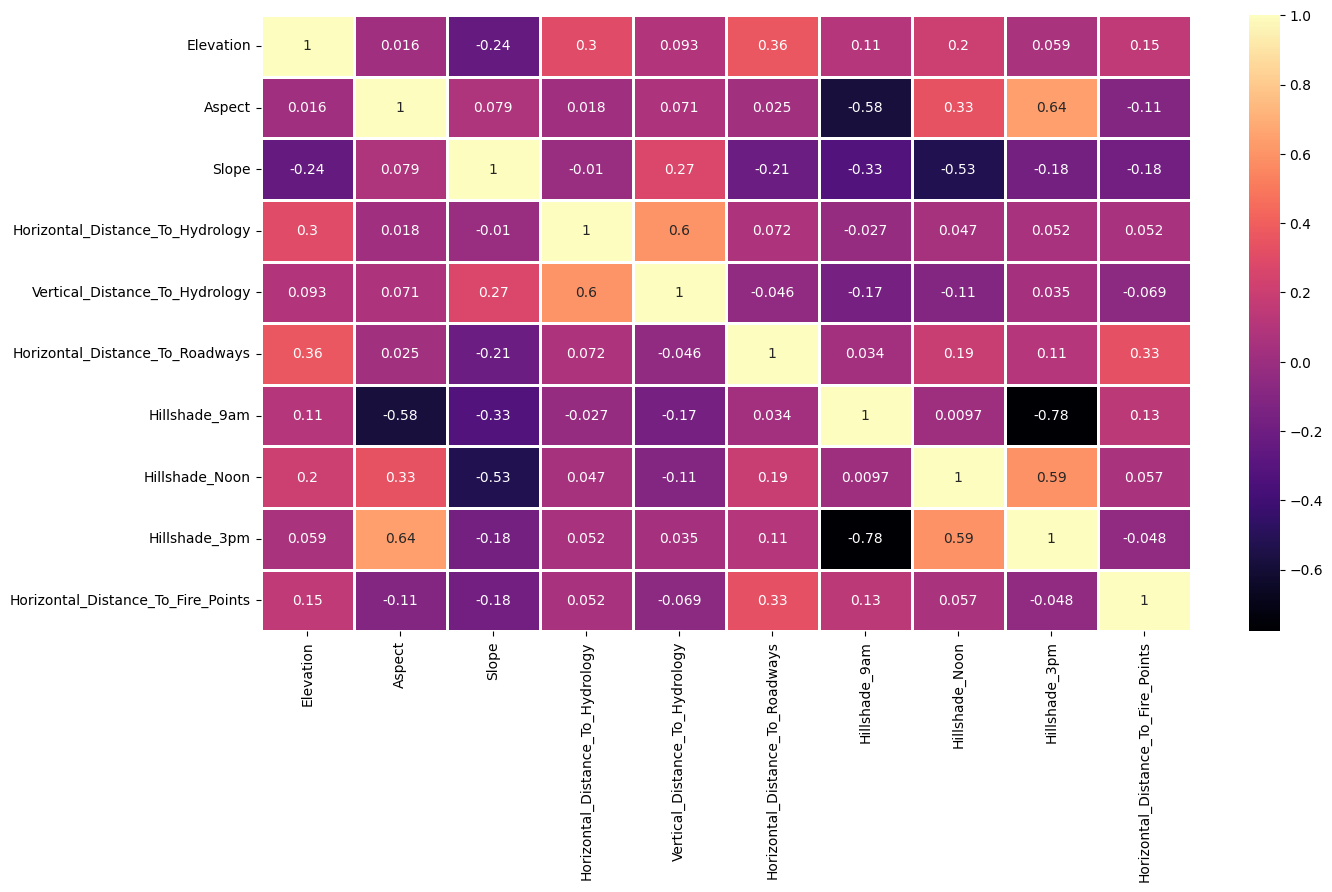

In [29]:
# Set up the heatmap figure and plot
plt.figure(figsize=(15, 8))

# Create a heatmap to visualize the correlation matrix of numerical columns
sns.heatmap(new_df[numerical_columns].corr(), cmap='magma', linecolor='white', linewidths=1, annot=True)

# Display the plot
plt.show()

* We have identified a notable correlation between certain features. Specifically,
 - 'Hillshade_9am' demonstrates a strong correlation with 'Hillshade_3pm',
 -  while 'Aspect' also exhibits a considerable correlation with 'Hillshade_3pm'.

#Trying out Diffrent Models

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate_classifier(classifier, param_grid, X_train, y_train, X_test, y_test):
    # Create the GridSearchCV object
    grid_search = GridSearchCV(classifier, param_grid, cv=3)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Print the best hyperparameters
    print("Best hyperparameters:", grid_search.best_params_)

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate the test set accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test set accuracy:", test_accuracy)

    # Calculate the precision, recall, and F1 score on the test set
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)

    return best_model, test_accuracy, precision, recall, f1


##Logistic Regression

In [31]:
final_result_dict = {}
model_saveing_root_path = "/content/Models"
os.makedirs("Models",exist_ok=True)

In [32]:

logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Train and evaluate Logistic Regression classifier
print("\nLogistic Regression:")
logistic_reg_clf = LogisticRegression(random_state=21,n_jobs=-1,multi_class='multinomial',solver='lbfgs')

logreg_model, logreg_accuracy,logreg_precision, logreg_recall, logreg_f1 = train_and_evaluate_classifier(logistic_reg_clf,
                                                                                                         logreg_param_grid,
                                                                                                         X_train,
                                                                                                         y_train,
                                                                                                         X_test,
                                                                                                         y_test)


Logistic Regression:
Best hyperparameters: {'C': 0.001}
Test set accuracy: 0.6183500302271353
Precision: 0.5633928426714441
Recall: 0.6183500302271353
F1 score: 0.5822537528212319


In [33]:
import pickle
os.makedirs(os.path.join(model_saveing_root_path,'LR'),exist_ok=True)
pickle.dump(logreg_model,open(os.path.join(model_saveing_root_path,'LR','best_model.pkl'),'wb'))
final_result_dict['logistic Regression'] = {'Accuracy':logreg_accuracy,
                                            'Precision':logreg_precision,
                                            'Recall':logreg_recall,
                                            'F1 Score':logreg_f1}

##KNN

In [34]:
y_train.value_counts()
y_test.value_counts()

2.0    45168
1.0    33777
3.0     5697
7.0     3269
6.0     2769
5.0     1514
4.0      438
Name: label, dtype: int64

In [35]:
knn_param_grid = {
      'n_neighbors': [1, 3, 5, 8, 10,15]
  }

# Train and evaluate K-Nearest Neighbors classifier
print("\nK-Nearest Neighbors:")
knn_model, knn_accuracy, knn_precision, knn_recall, knn_f1 = train_and_evaluate_classifier(KNeighborsClassifier(),
                                                                                           knn_param_grid,
                                                                                           X_train,
                                                                                           y_train,
                                                                                           X_test,
                                                                                           y_test)



K-Nearest Neighbors:
Best hyperparameters: {'n_neighbors': 1}
Test set accuracy: 0.9569911045858882
Precision: 0.9569549408582221
Recall: 0.9569911045858882
F1 score: 0.956965551013663


In [36]:
os.makedirs(os.path.join(model_saveing_root_path,'Knn'),exist_ok=True)
pickle.dump(knn_model,open(os.path.join(model_saveing_root_path,'Knn','best_model.pkl'),'wb'))
final_result_dict['KNN'] = {'Accuracy':knn_accuracy,
                                            'Precision':knn_precision,
                                            'Recall':knn_recall,
                                            'F1 Score':knn_f1}

##Random Forest

In [37]:
rf_param_grid = {
  'n_estimators': [4, 10, 20, 50, 100]
}

# Train and evaluate Random Forest classifier
print("\nRandom Forest:")
RF_model, RF_accuracy,RF_precision, RF_recall, RF_f1 = train_and_evaluate_classifier(RandomForestClassifier(),
                                                                                     rf_param_grid,
                                                                                     X_train,
                                                                                     y_train,
                                                                                     X_test,
                                                                                     y_test)



Random Forest:
Best hyperparameters: {'n_estimators': 100}
Test set accuracy: 0.9456991104585888
Precision: 0.9458248798146678
Recall: 0.9456991104585888
F1 score: 0.9453594095414569


In [39]:
os.makedirs(os.path.join(model_saveing_root_path,'RF'),exist_ok=True)
pickle.dump(RF_model,open(os.path.join(model_saveing_root_path,'RF','best_model.pkl'),'wb'))
final_result_dict['RF'] = {'Accuracy':RF_accuracy,
                                            'Precision':RF_precision,
                                            'Recall':RF_recall,
                                            'F1 Score':RF_f1}

In [40]:
final_result_dict

{'logistic Regression': {'Accuracy': 0.6183500302271353,
  'Precision': 0.5633928426714441,
  'Recall': 0.6183500302271353,
  'F1 Score': 0.5822537528212319},
 'KNN': {'Accuracy': 0.9569911045858882,
  'Precision': 0.9569549408582221,
  'Recall': 0.9569911045858882,
  'F1 Score': 0.956965551013663},
 'RF': {'Accuracy': 0.9456991104585888,
  'Precision': 0.9458248798146678,
  'Recall': 0.9456991104585888,
  'F1 Score': 0.9453594095414569}}

##XGBOOST

In [43]:
y_train.value_counts()

2.0    180670
1.0    135108
3.0     22789
7.0     13074
6.0     11074
5.0      6055
4.0      1755
Name: label, dtype: int64

In [44]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
# Train and evaluate XGBoost classifier
print("\nXGBoost:")
y_train = y_train.astype('int')-1
y_test = y_test.astype('int')-1
# Create the XGBoost classifier with GPU support
xgb_classifier = xgb.XGBClassifier(tree_method='gpu_hist', objective='multi:softmax', num_class=7)
xgb_model, xgb_accuracy,xgb_precision, xgb_recall, xgb_f1 = train_and_evaluate_classifier(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test)


XGBoost:
Best hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Test set accuracy: 0.9252526124881251
Precision: 0.9252649262188912
Recall: 0.9252526124881251
F1 score: 0.9250909807224758


In [45]:
os.makedirs(os.path.join(model_saveing_root_path,'xgb'),exist_ok=True)
pickle.dump(xgb_model,open(os.path.join(model_saveing_root_path,'xgb','best_model.pkl'),'wb'))
final_result_dict['xgb'] = {'Accuracy':xgb_accuracy,
                                            'Precision':xgb_precision,
                                            'Recall':xgb_recall,
                                            'F1 Score':xgb_f1}

In [46]:
final_result_dict

{'logistic Regression': {'Accuracy': 0.6183500302271353,
  'Precision': 0.5633928426714441,
  'Recall': 0.6183500302271353,
  'F1 Score': 0.5822537528212319},
 'KNN': {'Accuracy': 0.9569911045858882,
  'Precision': 0.9569549408582221,
  'Recall': 0.9569911045858882,
  'F1 Score': 0.956965551013663},
 'RF': {'Accuracy': 0.9456991104585888,
  'Precision': 0.9458248798146678,
  'Recall': 0.9456991104585888,
  'F1 Score': 0.9453594095414569},
 'xgb': {'Accuracy': 0.9252526124881251,
  'Precision': 0.9252649262188912,
  'Recall': 0.9252526124881251,
  'F1 Score': 0.9250909807224758}}

#DL MODEL

In [47]:
!pip install tensorflow

In [52]:
y_train = y_train.astype('int')-1
y_test = y_test.astype('int')-1

In [53]:
y_train.value_counts()

1    180670
0    135108
2     22789
6     13074
5     11074
4      6055
3      1755
Name: label, dtype: int64

In [54]:
y_train.value_counts()

1    180670
0    135108
2     22789
6     13074
5     11074
4      6055
3      1755
Name: label, dtype: int64

In [55]:
import numpy as np

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test,dtype=np.float32)

# convert class vectors to binary class matrices
y_train_DL = keras.utils.to_categorical(y_train, 7)
y_test_DL = keras.utils.to_categorical(y_test, 7)

In [56]:
def score(model,X_test,y_test,model_name=None):
  if model_name == "model1":
    y_pred = model.predict(X_test)



  else:
    X1 = X_test[:,:10]
    X2 = X_test[:,10:]

    y_pred = model.predict([X1,X2])


  y_pred = np.argmax(y_pred, axis=1)
  y_pred = y_pred +1

  # Calculate the test set accuracy
  test_accuracy = accuracy_score(y_test, y_pred)
  print("Test set accuracy:", test_accuracy)
  # Calculate the precision, recall, and F1 score on the test set
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 score:", f1)

  return test_accuracy,precision,recall,f1






In [57]:
# Define the number of classes in your multiclass problem
num_classes = 7  # Replace 10 with the actual number of classes in your dataset

# Create the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(54,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define a callback to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath=os.path.join(model_saveing_root_path,'NN1','best_model_1.h5'),
                                      monitor='val_loss',
                                      save_best_only=True,
                                      verbose=1)

In [58]:
# Assuming you have your training data X_train and corresponding labels y_train
model.fit(X_train, y_train_DL, epochs=100, batch_size=256, validation_split=0.1,callbacks=[checkpoint_callback])

Epoch 1/100
1302/1303 [============================>.] - ETA: 0s - loss: 2.6823 - accuracy: 0.5800
Epoch 1: val_loss improved from inf to 1.09428, saving model to /content/Models/NN1/best_model_1.h5
1303/1303 [==============================] - 13s 5ms/step - loss: 2.6815 - accuracy: 0.5800 - val_loss: 1.0943 - val_accuracy: 0.5675
Epoch 2/100
1303/1303 [==============================] - ETA: 0s - loss: 0.8636 - accuracy: 0.6552
Epoch 2: val_loss improved from 1.09428 to 0.79529, saving model to /content/Models/NN1/best_model_1.h5
1303/1303 [==============================] - 7s 5ms/step - loss: 0.8636 - accuracy: 0.6552 - val_loss: 0.7953 - val_accuracy: 0.6849
Epoch 3/100
1303/1303 [==============================] - ETA: 0s - loss: 0.7875 - accuracy: 0.6775
Epoch 3: val_loss improved from 0.79529 to 0.75290, saving model to /content/Models/NN1/best_model_1.h5
1303/1303 [==============================] - 6s 4ms/step - loss: 0.7875 - accuracy: 0.6775 - val_loss: 0.7529 - val_accuracy: 0.

In [61]:
y_test = y_test +1

In [62]:
model1_test_accuracy,model1_precision,model1_recall,model1_f1 = score(model,X_test,y_test,'model1')

2895/2895 [==============================] - 5s 2ms/step
Test set accuracy: 0.8352297262285171
Precision: 0.8366563610730213
Recall: 0.8352297262285171
F1 score: 0.8335965868895594


In [63]:
final_result_dict['model1'] = {'Accuracy':model1_test_accuracy,
                                            'Precision':model1_precision,
                                            'Recall':model1_recall,
                                            'F1 Score':model1_f1}

##NN2

In [64]:
# Create the first subnetwork
input1 = keras.Input(shape=(10,))
dense1_1 = layers.Dense(32, activation='relu')(input1)
dense1_2 = layers.Dense(16, activation='relu')(dense1_1)
output1 = layers.Dense(60, activation='relu', name='output1')(dense1_2)

# Create the second subnetwork
input2 = keras.Input(shape=(44,))
dense2_1 = layers.Dense(64, activation='relu')(input2)
dense2_2 = layers.Dense(32, activation='relu')(dense2_1)
output2 = layers.Dense(60, activation='relu', name='output2')(dense2_2)

# Concatenate the outputs of both subnetworks
concatenated = layers.Concatenate()([output1, output2])

# Create the final neural network using the combined outputs
final_output = layers.Dense(60, activation='relu', name='final_output')(concatenated)
final_output = layers.Dense(32, activation='relu', name='final_output2')(final_output)
final_output = layers.Dense(16, activation='relu', name='final_output3')(final_output)
final_output = layers.Dense(7, activation='softmax', name='final_output4')(final_output)



# Create the combined model
model2 = keras.Model(inputs=[input1, input2], outputs=final_output)

# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define a callback to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath=os.path.join(model_saveing_root_path,'NN2','best_model_1.h5'),
                                      monitor='val_loss',
                                      save_best_only=True,
                                      verbose=1)

In [65]:
X1 = X_train[:,:10]
X2 = X_train[:,10:]

# Assuming you have your training data X1, X2, and corresponding labels y
# Make sure X1, X2, and y are properly preprocessed and have the correct data types.

# Train the model using the combined inputs
model2.fit([X1, X2], y_train_DL, epochs=100, batch_size=256, validation_split=0.1,callbacks=[checkpoint_callback])


Epoch 1/100
1301/1303 [============================>.] - ETA: 0s - loss: 1.4355 - accuracy: 0.6381
Epoch 1: val_loss improved from inf to 0.71001, saving model to /content/Models/NN2/best_model_1.h5
1303/1303 [==============================] - 12s 7ms/step - loss: 1.4347 - accuracy: 0.6381 - val_loss: 0.7100 - val_accuracy: 0.6964
Epoch 2/100
1302/1303 [============================>.] - ETA: 0s - loss: 0.6695 - accuracy: 0.7148
Epoch 2: val_loss improved from 0.71001 to 0.63706, saving model to /content/Models/NN2/best_model_1.h5
1303/1303 [==============================] - 7s 6ms/step - loss: 0.6695 - accuracy: 0.7148 - val_loss: 0.6371 - val_accuracy: 0.7368
Epoch 3/100
1301/1303 [============================>.] - ETA: 0s - loss: 0.6202 - accuracy: 0.7398
Epoch 3: val_loss improved from 0.63706 to 0.59760, saving model to /content/Models/NN2/best_model_1.h5
1303/1303 [==============================] - 8s 6ms/step - loss: 0.6202 - accuracy: 0.7398 - val_loss: 0.5976 - val_accuracy: 0.

In [66]:
model2_test_accuracy,model2_precision,model2_recall,model2_f1 = score(model2,X_test,y_test)

2895/2895 [==============================] - 7s 2ms/step
Test set accuracy: 0.859800069090595
Precision: 0.8605031535707216
Recall: 0.859800069090595
F1 score: 0.8587919882895976


In [67]:
final_result_dict['model2'] = {'Accuracy':model2_test_accuracy,
                                            'Precision':model2_precision,
                                            'Recall':model2_recall,
                                            'F1 Score':model2_f1}

In [68]:
# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Add data to the table
for model, metrics in final_result_dict.items():
    table.add_row([model,
                   metrics['Accuracy'],
                   metrics['Precision'],
                   metrics['Recall'],
                   metrics['F1 Score']])

# Print the table
print(table)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
| logistic Regression | 0.6183500302271353 | 0.5633928426714441 | 0.6183500302271353 | 0.5822537528212319 |
|         KNN         | 0.9569911045858882 | 0.9569549408582221 | 0.9569911045858882 | 0.956965551013663  |
|          RF         | 0.9456991104585888 | 0.9458248798146678 | 0.9456991104585888 | 0.9453594095414569 |
|         xgb         | 0.9252526124881251 | 0.9252649262188912 | 0.9252526124881251 | 0.9250909807224758 |
|        model1       | 0.8352297262285171 | 0.8366563610730213 | 0.8352297262285171 | 0.8335965868895594 |
|        model2       | 0.859800069090595  | 0.8605031535707216 | 0.859800069090595  | 0.8587919882895976 |
+---------------------+-----

# conclusion:
  * based on the performace of diffrent model the KNN performs best & RF berforms second best hence choosing the KNN for the prediction of our unseen data.

In [69]:
test_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,3273.0,38.0,13.0,212.0,50.0,3240.0,219.0,212.0,125.0,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2660.0,21.0,13.0,162.0,15.0,3373.0,211.0,212.0,135.0,2992.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2505.0,106.0,20.0,180.0,45.0,953.0,249.0,211.0,81.0,1366.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2465.0,12.0,19.0,162.0,46.0,319.0,196.0,197.0,133.0,1140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2739.0,294.0,21.0,42.0,4.0,1300.0,155.0,229.0,212.0,1471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117850,3017.0,3.0,10.0,342.0,50.0,458.0,206.0,220.0,152.0,469.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117851,2742.0,77.0,27.0,95.0,65.0,120.0,242.0,179.0,49.0,1426.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117852,3277.0,113.0,13.0,201.0,19.0,1640.0,241.0,227.0,113.0,2262.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117853,3322.0,254.0,7.0,990.0,212.0,1230.0,204.0,245.0,179.0,2971.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data = preprocessor.transform(test_df)

# Convert the transformed data back to a DataFrame
data = pd.DataFrame(data, columns=numerical_columns.tolist() + binary_columns.tolist())


In [80]:
knn_prediction = knn_model.predict(data)
knn_prediction_proba = knn_model.predict_proba(data)

In [ ]:
prediction

In [82]:
RF_prediction = RF_model.predict(data)
RF_prediction_proba = RF_model.predict_proba(data)

In [84]:
predictions_RF = pd.DataFrame({'label':RF_prediction})
predictions_KNN = pd.DataFrame({'label':knn_prediction})
predictions_RF.to_csv("Avnishkumar_mishra_RF.csv",
header = True,
index = True,
sep='\t')
predictions_KNN.to_csv("Avnishkumar_mishra_KNN.csv",
header = True,
index = True,
sep='\t')